---

In [5]:
import json          
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import sys
from pathlib import Path
from rich.console import Console
from bokeh.plotting import output_notebook

import warnings
import canonical_toolkit as ctk

In [6]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DATA_FOLDER = "__data__/run_0013/"
# DATA_FOLDER = None
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [7]:
warnings.filterwarnings("ignore", message="n_jobs value.*overridden.*")
output_notebook()
console = Console()                                                                                                                                                                                                                                                        
sys.path.insert(0, str(Path.cwd().parent))                                                                                                                                                                                                                                 
from ea.config import Config 

if not DATA_FOLDER:
    df = pd.read_csv('run_history.csv')
    DATA_FOLDER = df['output_folder'].iloc[-1]

print(DATA_FOLDER)
data = pd.read_sql("SELECT * FROM individual", sqlite3.connect(f"{DATA_FOLDER}/database.db"))
config = Config.load(DATA_FOLDER)
config.large_description()

Loading BokehJS ...

__data__/run_0013/


                                              EA Configuration (Full)                                              
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Setting            ┃ Value                                                                ┃ Type                ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ SEED               │ 42                                                                   │ int                 │
│ RUN_NAME           │ run                                                                  │ str                 │
│ QUIET              │ ✗                                                                    │ bool                │
│ LOG_LEVEL          │ INFO                                                                 │ <enum 'LogLevel     │
│ STORE_STRING       │ ✓                                                                    │ bool                │
│ STORE_IMG          │ ✓                                                                    │ bool                │
│ NUM_MODULES        │ 20                                                                   │ int                 │
│ GENOTYPE_SIZE      │ 64                                                                   │ int                 │
│ SCALE              │ 8192.0                                                               │ float               │
│ REV_SCALING_FACTOR │ -0.5                                                                 │ float               │
│ POPULATION_SIZE    │ 100                                                                  │ int                 │
│ NUM_GENERATIONS    │ 100                                                                  │ int                 │
│ IS_MAXIMISATION    │ ✓                                                                    │ bool                │
│ PENALTY            │ ✗                                                                    │ bool                │
│ FITNESS_NOVELTY    │ ✓                                                                    │ bool                │
│ NOVELTY_METHOD     │ ctk                                                                  │ str                 │
│ FITNESS_SPEED      │ ✗                                                                    │ bool                │
│ STORE_NOVELTY      │ ✓                                                                    │ bool | None         │
│ STORE_SPEED        │ ✗                                                                    │ bool | None         │
│ TOTAL_SIM_DURATION │ 90.0                                                                 │ float               │
│ SIM_WARMUP         │ 30.0                                                                 │ float               │
│ TOURNAMENT         │ ✓                                                                    │ bool                │
│ K_TOURNAMENT       │ 2                                                                    │ int                 │
│ SAVE_SPACES        │ ['', 'R_#__', 'A_#__', 'R_l__', 'R_f__', 'R_r__', 'R_b__', 'A_t__',  │ list | None         │
│                    │ 'A_b__']                                                             │                     │
│ NOVELTY_SPACES     │ ['', 'A_#__']                                                        │ list | None         │
│ MAX_HOP_RADIUS     │ 3                                                                    │ int | None          │
│ K_NOVELTY          │ 1                                                                    │ int                 │
│ ARCHIVE_CHANCE     │ 0.1                                                                  │ float               │
│ OUTPUT_FOLDER      │ __data__/run_0013                                                    │ pathlib._local.Path │
└────────────────────┴──────────────────────────────────

In [8]:
tags_expanded = data['tags_'].apply(lambda x: json.loads(x) if isinstance(x, str) else x).apply(pd.Series)                                        
data = pd.concat([data, tags_expanded], axis=1)                                                                                                   
                                                                                                                                                                                                                                                     
data['gen'] = data.apply(                                                                                                                         
    lambda row: list(range(int(row['time_of_birth']), int(row['time_of_death']) + 1)),                                                            
    axis=1                                                                                                                                        
)   
                                                                                                                                              
gen_df = (data                                                                                                                                                     
    .explode('gen')                                                                                                                                                
    .rename(columns={'fitness_': 'fitness', 'genotype_': 'genotype', 'tags_': 'tags'})                                                                             
    .sort_values(['gen', 'ctk_string'], ascending=[True, True])                                                                                                    
)                                                                                                                                               
                                                                                                                                                
# Add rank within each generation                                                                                                                 
gen_df['rank'] = gen_df.groupby('gen').cumcount()                                                                                                                  
gen_df = gen_df.set_index(['gen', 'rank'])
gen_df.head()

id  alive  time_of_birth  time_of_death  requires_eval   fitness  \
gen rank                                                                     
0   0     41      0              0              1              0  0.616451   
    1     92      0              0              1              0  0.625277   
    2     76      0              0              2              0  0.625277   
    3     65      0              0              2              0  0.651803   
    4     75      0              0              2              0  0.678677   

          requires_init                                           genotype  \
gen rank                                                                     
0   0                 0  [[8141.530271080825, 2782.004759445046, -791.5...   
    1                 0  [[2076.2076689217247, 1947.5175766403481, -478...   
    2                 0  [[-6129.4113873936785, -3601.302300737898, 652...   
    3                 0  [[7206.039139211545, -2634.269929215232, 3170....   
    4                 0  [[-7389.5642352614705, -4537.62004106225, 4816...   

                                                       tags  \
gen rank                                                      
0   0     {"ctk_string": "C<b(B3[r(B2[b(B2H6)l(B6[l(B6[b...   
    1     {"ctk_string": "C<b(B[b(B[b(BH5H7)])]B3[l(B3[b...   
    2     {"ctk_string": "C<t(B6[l(B2[r(B3H4H7)])r(B6H5H...   
    3     {"ctk_string": "C<t(B7[l(B3[r(B2H4)b(B3[l(B2)r...   
    4     {"ctk_string": "C[f(B)]<t(B1[r(B2[r(B2)t(B4[l(...   

                                                 ctk_string  \
gen rank                                                      
0   0     C<b(B3[r(B2[b(B2H6)l(B6[l(B6[b(B6)]H5)])]H4H1)...   
    1     C<b(B[b(B[b(BH5H7)])]B3[l(B3[b(B2[r(B7)])]B2H4...   
    2      C<t(B6[l(B2[r(B3H4H7)])r(B6H5H7)t(B[b(B1H5)])])>   
    3     C<t(B7[l(B3[r(B2H4)b(B3[l(B2)r(B5)])]H5H7)]B7H4)>   
    4     C[f(B)]<t(B1[r(B2[r(B2)t(B4[l(B6[b(B1H4)]B)b(B...   

                                                      image   novelty archived  
gen rank                                                                        
0   0     data:image/webp;base64,UklGRj4CAABXRUJQVlA4WAo...  0.616451      NaN  
    1     data:image/webp;base64,UklGRjYCAABXRUJQVlA4WAo...  0.625277      NaN  
    2     data:image/webp;base64,UklGRtYCAABXRUJQVlA4WAo...  0.625277     True  
    3     data:image/webp;base64,UklGRswCAABXRUJQVlA4WAo...  0.651803     True  
    4     data:image/webp;base64,UklGRtwBAABXRUJQVlA4WAo...  0.678677      NaN

In [9]:
survivors_df = gen_df.reset_index()
survivors_df = survivors_df[survivors_df['time_of_death'] > survivors_df['gen']]
survivors_df = survivors_df.set_index(['gen', 'rank'])
survivors_df.head()

id  alive  time_of_birth  time_of_death  requires_eval   fitness  \
gen rank                                                                     
0   0     41      0              0              1              0  0.616451   
    1     92      0              0              1              0  0.625277   
    2     76      0              0              2              0  0.625277   
    3     65      0              0              2              0  0.651803   
    4     75      0              0              2              0  0.678677   

          requires_init                                           genotype  \
gen rank                                                                     
0   0                 0  [[8141.530271080825, 2782.004759445046, -791.5...   
    1                 0  [[2076.2076689217247, 1947.5175766403481, -478...   
    2                 0  [[-6129.4113873936785, -3601.302300737898, 652...   
    3                 0  [[7206.039139211545, -2634.269929215232, 3170....   
    4                 0  [[-7389.5642352614705, -4537.62004106225, 4816...   

                                                       tags  \
gen rank                                                      
0   0     {"ctk_string": "C<b(B3[r(B2[b(B2H6)l(B6[l(B6[b...   
    1     {"ctk_string": "C<b(B[b(B[b(BH5H7)])]B3[l(B3[b...   
    2     {"ctk_string": "C<t(B6[l(B2[r(B3H4H7)])r(B6H5H...   
    3     {"ctk_string": "C<t(B7[l(B3[r(B2H4)b(B3[l(B2)r...   
    4     {"ctk_string": "C[f(B)]<t(B1[r(B2[r(B2)t(B4[l(...   

                                                 ctk_string  \
gen rank                                                      
0   0     C<b(B3[r(B2[b(B2H6)l(B6[l(B6[b(B6)]H5)])]H4H1)...   
    1     C<b(B[b(B[b(BH5H7)])]B3[l(B3[b(B2[r(B7)])]B2H4...   
    2      C<t(B6[l(B2[r(B3H4H7)])r(B6H5H7)t(B[b(B1H5)])])>   
    3     C<t(B7[l(B3[r(B2H4)b(B3[l(B2)r(B5)])]H5H7)]B7H4)>   
    4     C[f(B)]<t(B1[r(B2[r(B2)t(B4[l(B6[b(B1H4)]B)b(B...   

                                                      image   novelty archived  
gen rank                                                                        
0   0     data:image/webp;base64,UklGRj4CAABXRUJQVlA4WAo...  0.616451      NaN  
    1     data:image/webp;base64,UklGRjYCAABXRUJQVlA4WAo...  0.625277      NaN  
    2     data:image/webp;base64,UklGRtYCAABXRUJQVlA4WAo...  0.625277     True  
    3     data:image/webp;base64,UklGRswCAABXRUJQVlA4WAo...  0.651803     True  
    4     data:image/webp;base64,UklGRtwBAABXRUJQVlA4WAo...  0.678677      NaN

In [10]:
killed_df = gen_df.reset_index()
killed_df = killed_df[killed_df['time_of_death'] == killed_df['gen']]
killed_df = killed_df.set_index(['gen', 'rank'])
killed_df.head()

id  alive  time_of_birth  time_of_death  requires_eval   fitness  \
gen rank                                                                      
1   0      41      0              0              1              0  0.616451   
    1      92      0              0              1              0  0.625277   
    2     162      0              1              1              0  0.648211   
    8       6      0              0              1              0  0.688754   
    14     17      0              0              1              0  0.657694   

          requires_init                                           genotype  \
gen rank                                                                     
1   0                 0  [[8141.530271080825, 2782.004759445046, -791.5...   
    1                 0  [[2076.2076689217247, 1947.5175766403481, -478...   
    2                 0  [[4225.844242264723, 1880.9622357974113, 182.3...   
    8                 0  [[599.1303344470307, -1072.1184203130415, -603...   
    14                0  [[5173.471012379257, 3662.796457440105, 6047.2...   

                                                       tags  \
gen rank                                                      
1   0     {"ctk_string": "C<b(B3[r(B2[b(B2H6)l(B6[l(B6[b...   
    1     {"ctk_string": "C<b(B[b(B[b(BH5H7)])]B3[l(B3[b...   
    2     {"ctk_string": "C<t(B2[b(B2[r(B)t(B3B2H5)]B6[t...   
    8     {"ctk_string": "C[f(B2[r(B2)]B[t(B6[t(B2)]H)r(...   
    14    {"ctk_string": "C[f(B2[r(B6[b(B6)]H5HH2)]H)]<b...   

                                                 ctk_string  \
gen rank                                                      
1   0     C<b(B3[r(B2[b(B2H6)l(B6[l(B6[b(B6)]H5)])]H4H1)...   
    1     C<b(B[b(B[b(BH5H7)])]B3[l(B3[b(B2[r(B7)])]B2H4...   
    2     C<t(B2[b(B2[r(B)t(B3B2H5)]B6[t(B3B)]H1H5)]H5H5...   
    8      C[f(B2[r(B2)]B[t(B6[t(B2)]H)r(B[t(B6H6)]H5H6)])]   
    14                C[f(B2[r(B6[b(B6)]H5HH2)]H)]<b(BH7H)>   

                                                      image   novelty archived  
gen rank                                                                        
1   0     data:image/webp;base64,UklGRj4CAABXRUJQVlA4WAo...  0.616451      NaN  
    1     data:image/webp;base64,UklGRjYCAABXRUJQVlA4WAo...  0.625277      NaN  
    2     data:image/webp;base64,UklGRgADAABXRUJQVlA4WAo...  0.648211      NaN  
    8     data:image/webp;base64,UklGRnQCAABXRUJQVlA4WAo...  0.688754      NaN  
    14    data:image/webp;base64,UklGRngCAABXRUJQVlA4WAo...  0.657694      NaN

In [11]:
# temp_df = gen_df.reset_index()
# dead_pool = temp_df[temp_df['time_of_death'] == temp_df['gen']].copy()
# max_gen_limit = int(temp_df['gen'].max())
# dead_pool['gen'] = dead_pool.apply(
#     lambda row: list(range(int(row['gen']), max_gen_limit + 1)), 
#     axis=1
# )
# archived_df = dead_pool.explode('gen')
# archived_df['gen'] = archived_df['gen'].astype(int)
# archived_df = archived_df[archived_df['archived'] == True]

# archived_df = archived_df.sort_values(['gen'], ascending=[True])
# archived_df['rank'] = archived_df.groupby('gen').cumcount()
# archived_df = archived_df.set_index(['gen', 'rank'])

# archived_df.head()

In [12]:
def plot_fittest_robots(gen_df, by, amt, config):
    # 1. Identify the last generation
    last_gen = gen_df['gen'].max()
    
    # 2. Filter for only the last generation and sort by fitness
    # We sort descending if IS_MAXIMISATION is True to get the "fittest" at the top
    fittest_df = gen_df[gen_df['gen'] == last_gen].sort_values(
        by=by, 
        ascending=not config.IS_MAXIMISATION
    ).head(amt)

    # 3. Prepare data for the plotter
    # GridPlotter usually expects a 2D list [rows][columns]
    images = []
    titles = []

    for row in fittest_df.itertuples():
        img = ctk.quick_view(
            ctk.node_from_string(row.ctk_string).to_graph(),
            return_img=True,
            white_background=True
        )
        images.append(img)
        
        metric_val = getattr(row, by)
        titles.append(f"ID {row.id} | {by}={metric_val:.3f}")

    # 4. Initialize and configure the plotter
    plotter = ctk.GridPlotter()
    plotter.config.title_size = 10
    plotter.config.margin = (0.3, 0, 0, 0)
    plotter.config.col_space = 0.23
    plotter.config.dpi = 300
    
    # Wrap in lists to create a single-row 2D structure for the plotter
    plotter.add_2D_image_data([images], titles_2d=[titles])
    
    plotter.suptitle(f"Top {amt} Fittest Robots (Gen {last_gen}) by {by.capitalize()}", font_size=8)
    
    return plotter

---

### Plot fitness + 'stored values'

In [13]:
from ea.analysis.plot_metrics import plot_metrics

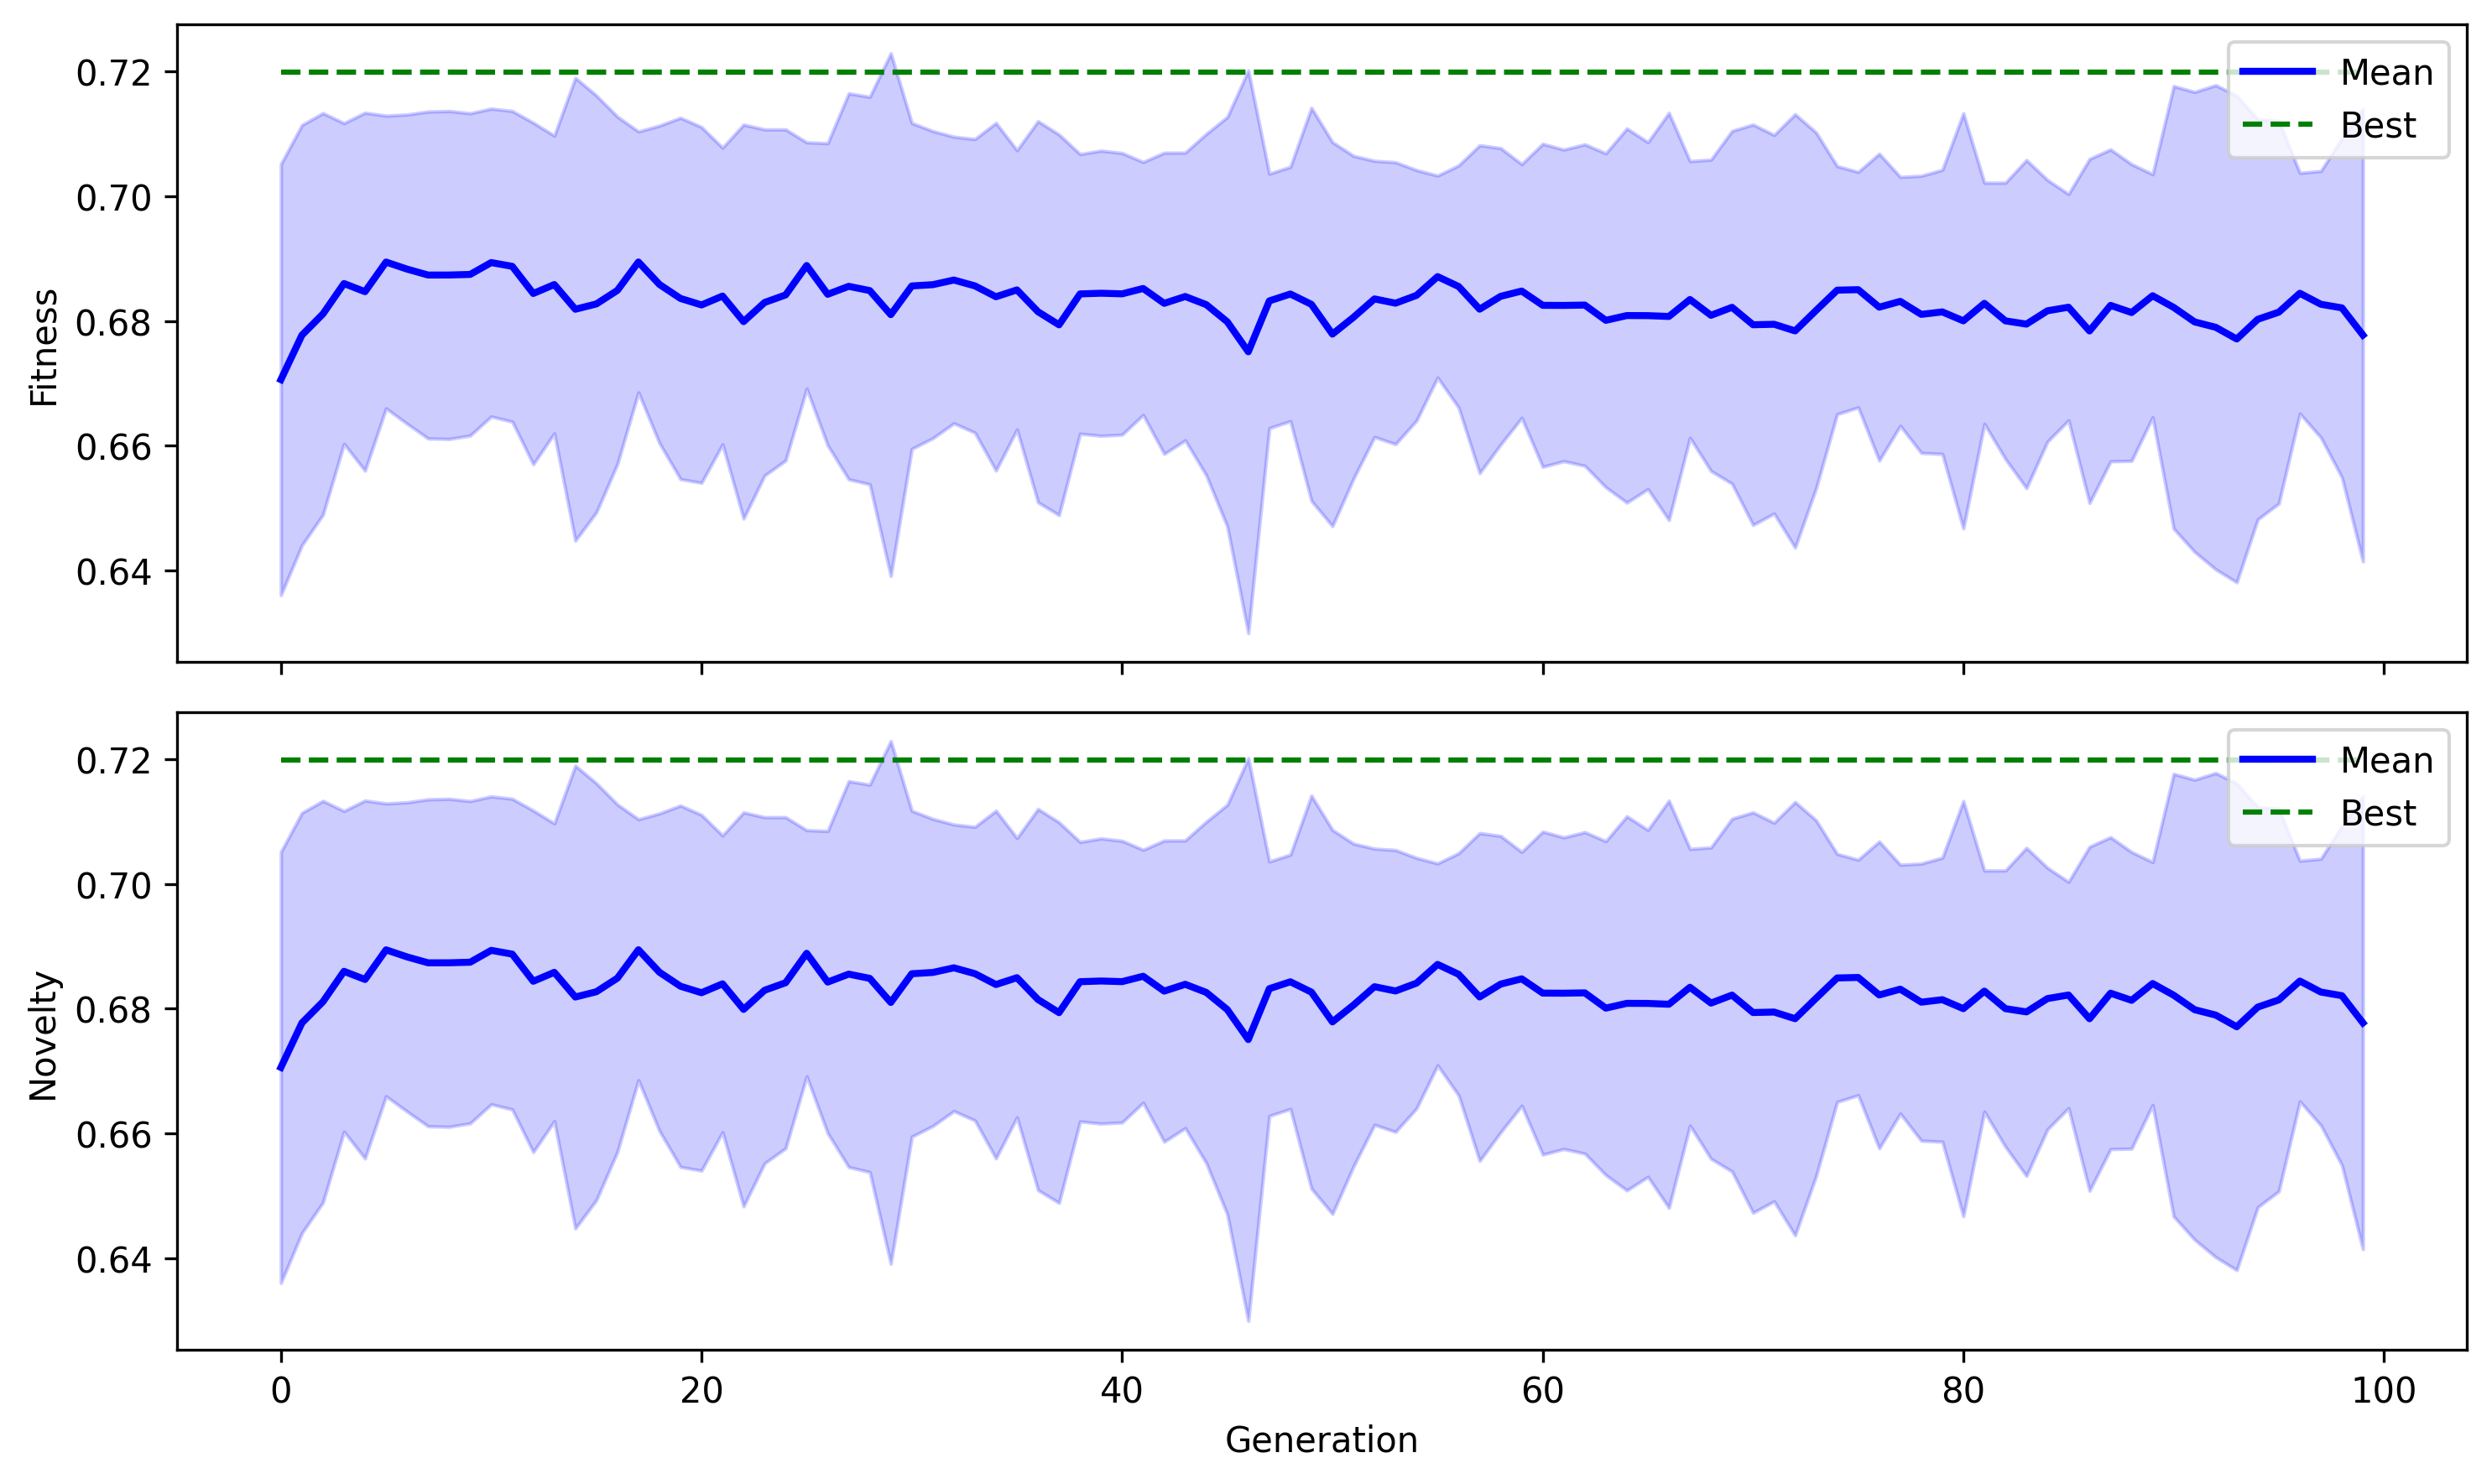

In [14]:
to_plot = ['fitness']
if config.STORE_NOVELTY:
    to_plot.append('novelty')
if config.STORE_SPEED:
    to_plot.append('speed')
                                                                                                                                                                
plot_metrics(survivors_df, metrics=to_plot, is_max=config.IS_MAXIMISATION)  

### Livespan Fittest Individuals

In [15]:
from ea.analysis.plot_top_lifespans import plot_top_lifespans                                                                                                                               

In [16]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
column = 'fitness'
top_x = 10
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

(<Figure size 6000x2400 with 1 Axes>,
 <Axes: title={'center': 'Individuals Ever in Top 10 (in top 10 that gen)'}, xlabel='Generation', ylabel='fitness'>)

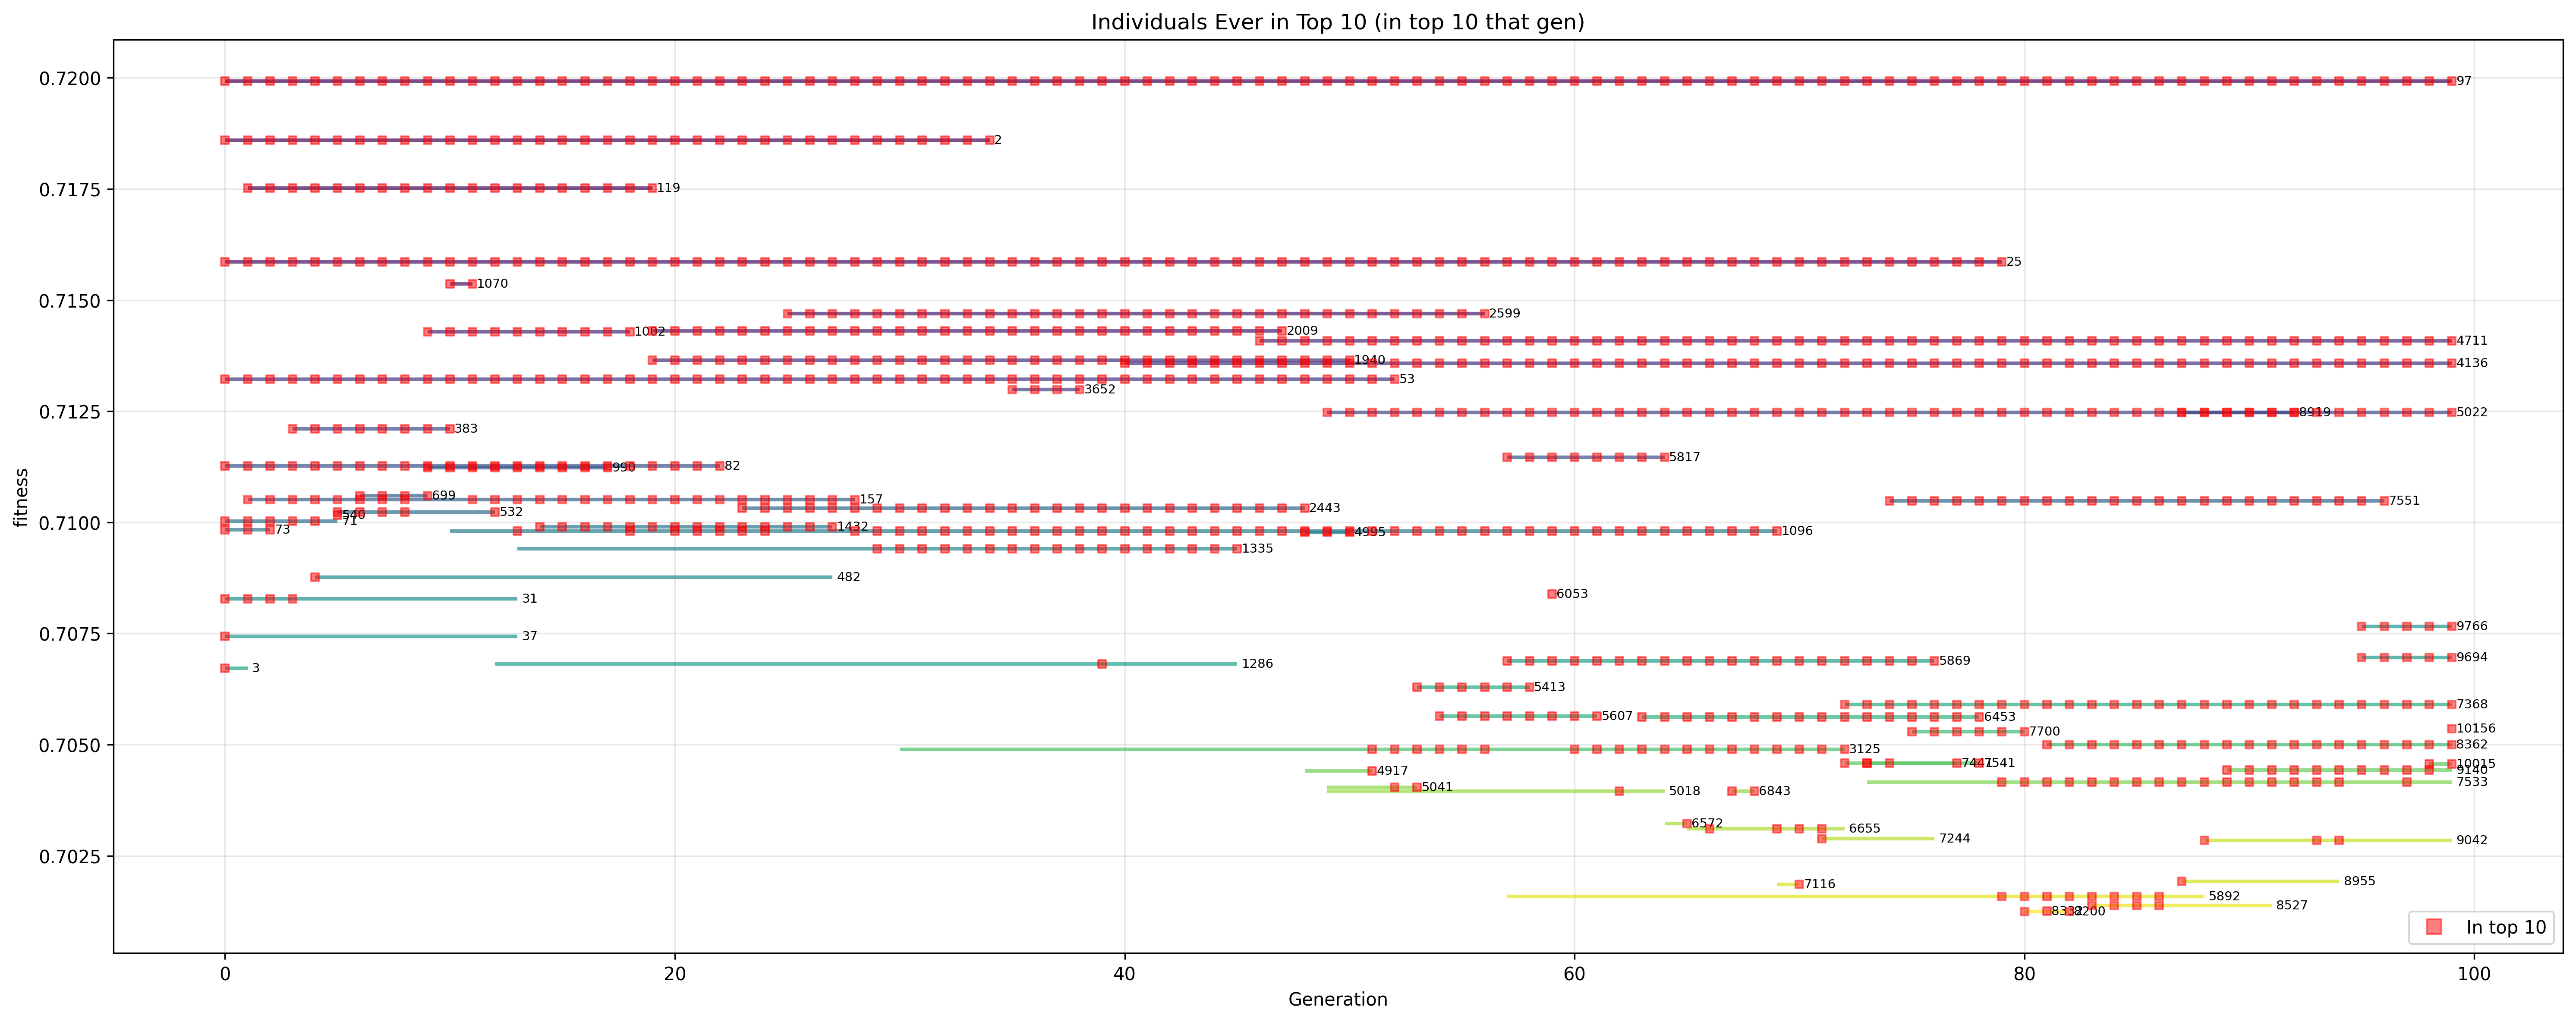

In [17]:
plot_top_lifespans(survivors_df, is_maximalisation=config.IS_MAXIMISATION, column=column, top_x=top_x)

In [18]:
from ea.analysis.plot_lifespan_analysis import plot_lifespan_analysis

In [19]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fitness_lim = (
    0, 
    1
)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

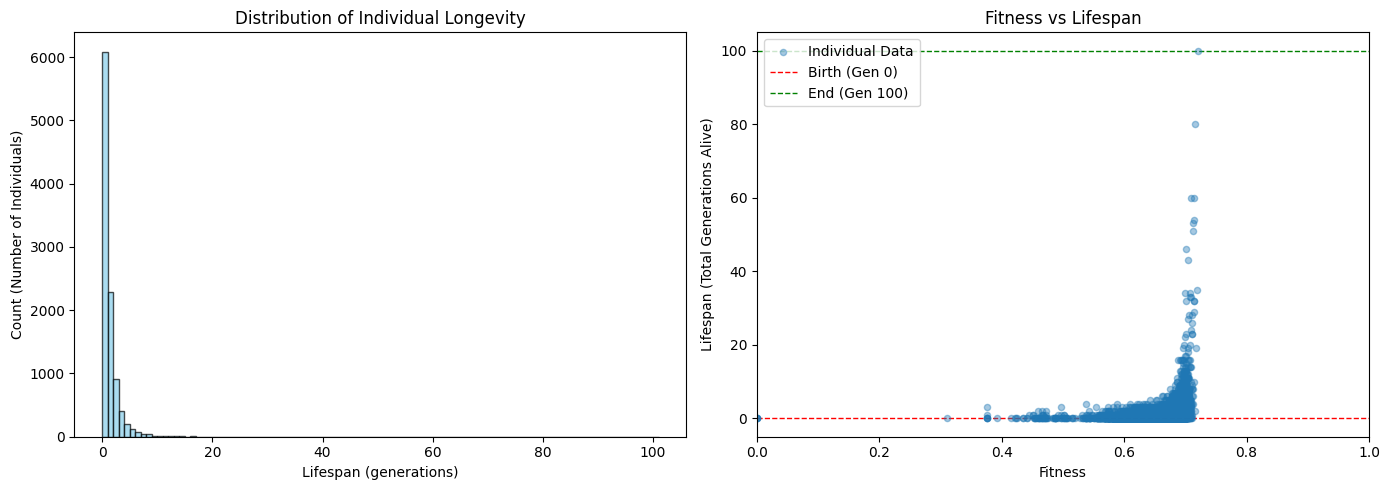

In [20]:
plot_lifespan_analysis(gen_df, fitness_xlim=fitness_lim)

---

### Quick Dirty Robot Generation Plotter

In [21]:
from IPython.display import HTML                                                                                                                                           

In [22]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plot_generation = config.NUM_GENERATIONS-1
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plotting generation 99



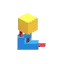
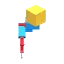
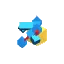
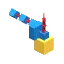
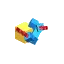
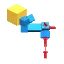
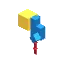
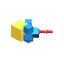
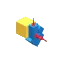
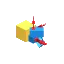
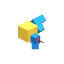
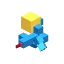
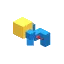
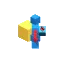
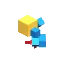
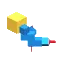
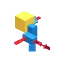
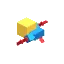
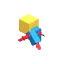
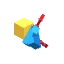
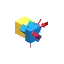
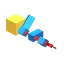
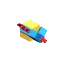
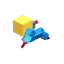
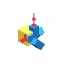
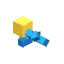
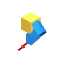
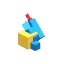
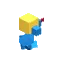
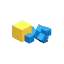
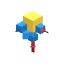
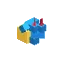
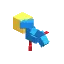
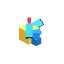
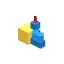
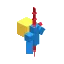
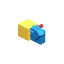
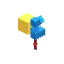
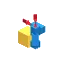
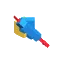
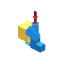
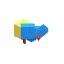
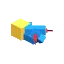
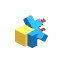
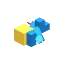
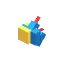
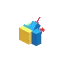
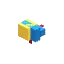
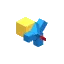
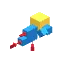
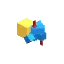
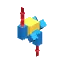
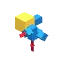
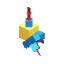
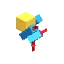
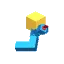
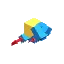
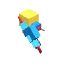
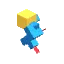
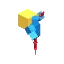
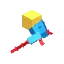
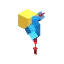
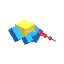
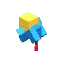
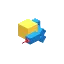
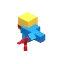
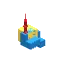
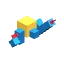
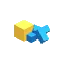
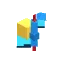
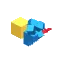
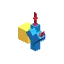
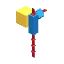
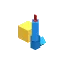
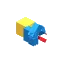
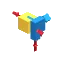
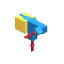
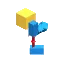
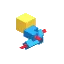
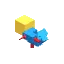
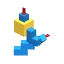
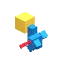
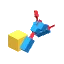
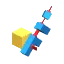
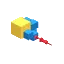
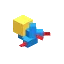
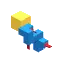
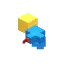
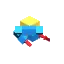
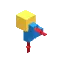
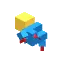
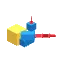
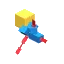
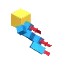
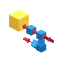
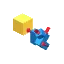
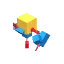
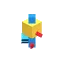
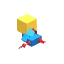
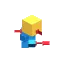
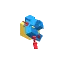
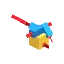
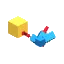
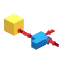
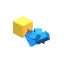
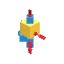
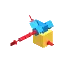
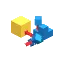
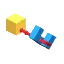
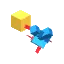
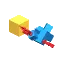
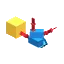
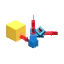
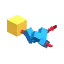
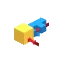
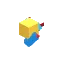
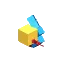
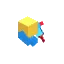
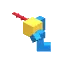
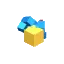
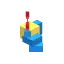
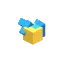
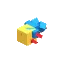
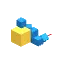
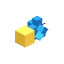
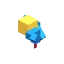
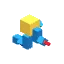
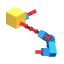
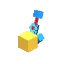
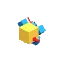
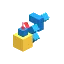
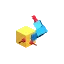
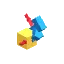
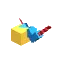
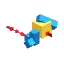
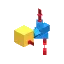
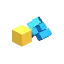
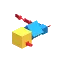
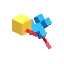
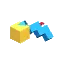
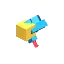
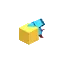
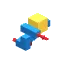
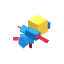
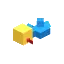
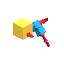
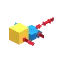
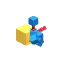
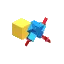
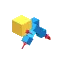
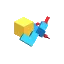
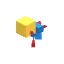
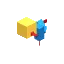
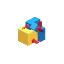
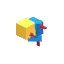
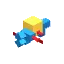
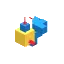
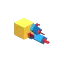
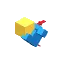
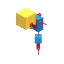
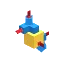
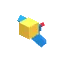
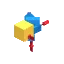
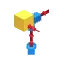
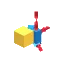
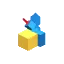
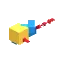
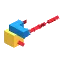
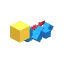
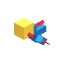
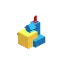
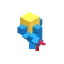
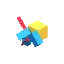
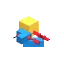
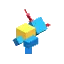
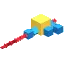
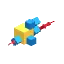
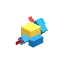
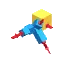
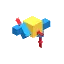
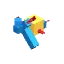
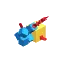
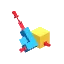
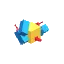
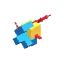
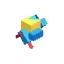
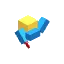
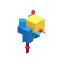
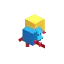
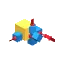
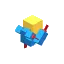
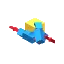
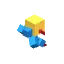
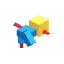
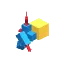
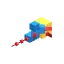
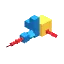
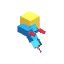
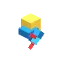
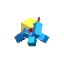
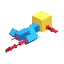
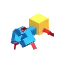

In [23]:
html = "<div style='display:flex; flex-wrap:wrap; gap:12px; font-family:sans-serif;'>"
for _, row in gen_df.loc[plot_generation].iterrows():
    html += f'''
    <div style="display:flex; flex-direction:column; align-items:center; width:64px;">
        <img src="{row["image"]}" 
             title="ID: {row.get('id', '??')}" 
             style="height:64px; width:64px; object-fit:cover;">
        <span style="font-size:10px; color:#666; margin-top:4px; font-weight:bold;">
            {row["id"]}
        </span>
    </div>
    '''
html += "</div>"
print(f'plotting generation {plot_generation}')
plot_generation = (plot_generation + 1) % config.NUM_GENERATIONS
HTML(html)

plotting generation 0



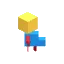
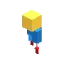
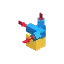
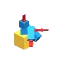
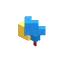
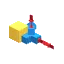
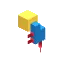
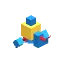
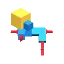
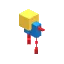
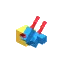
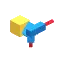
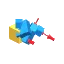
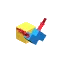
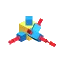
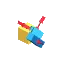
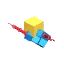
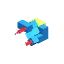
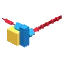
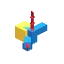
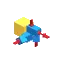
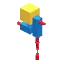
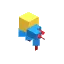
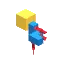
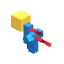
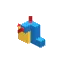
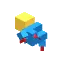
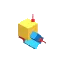
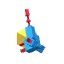
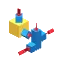
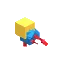
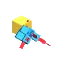
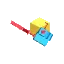
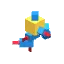
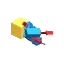
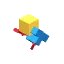
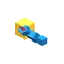
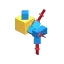
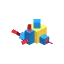
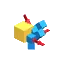
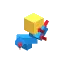
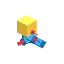
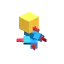
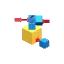
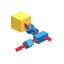
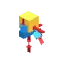
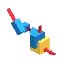
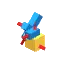
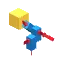
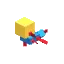
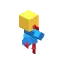
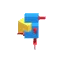
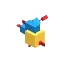
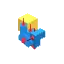
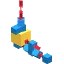
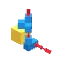
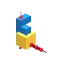
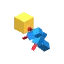
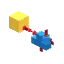
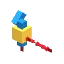
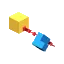
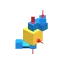
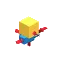
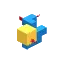
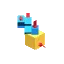
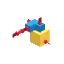
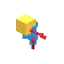
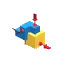
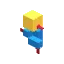
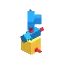
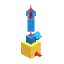
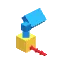
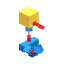
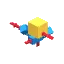
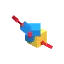
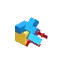
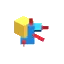
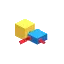
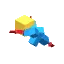
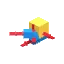
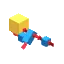
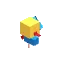
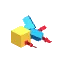
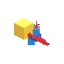
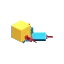
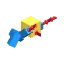
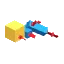
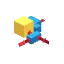
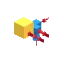
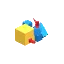
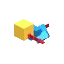
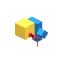
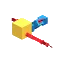
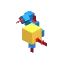
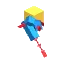
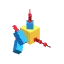
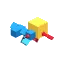
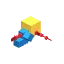
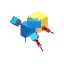
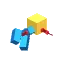

In [24]:
html = "<div style='display:flex; flex-wrap:wrap; gap:12px; font-family:sans-serif;'>"
for _, row in survivors_df.loc[plot_generation].iterrows():
    html += f'''
    <div style="display:flex; flex-direction:column; align-items:center; width:64px;">
        <img src="{row["image"]}" 
             title="ID: {row.get('id', '??')}" 
             style="height:64px; width:64px; object-fit:cover;">
        <span style="font-size:10px; color:#666; margin-top:4px; font-weight:bold;">
            {row["id"]}
        </span>
    </div>
    '''
html += "</div>"
print(f'plotting generation {plot_generation}')
plot_generation = (plot_generation + 1) % config.NUM_GENERATIONS
HTML(html)

In [25]:
from ea.analysis.high_res_robot_gens import high_res_robot_gens

In [26]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
amt = 3
gen_samples = 5
# or fitness/ novelty
col_name = 'fitness'
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plot fittest

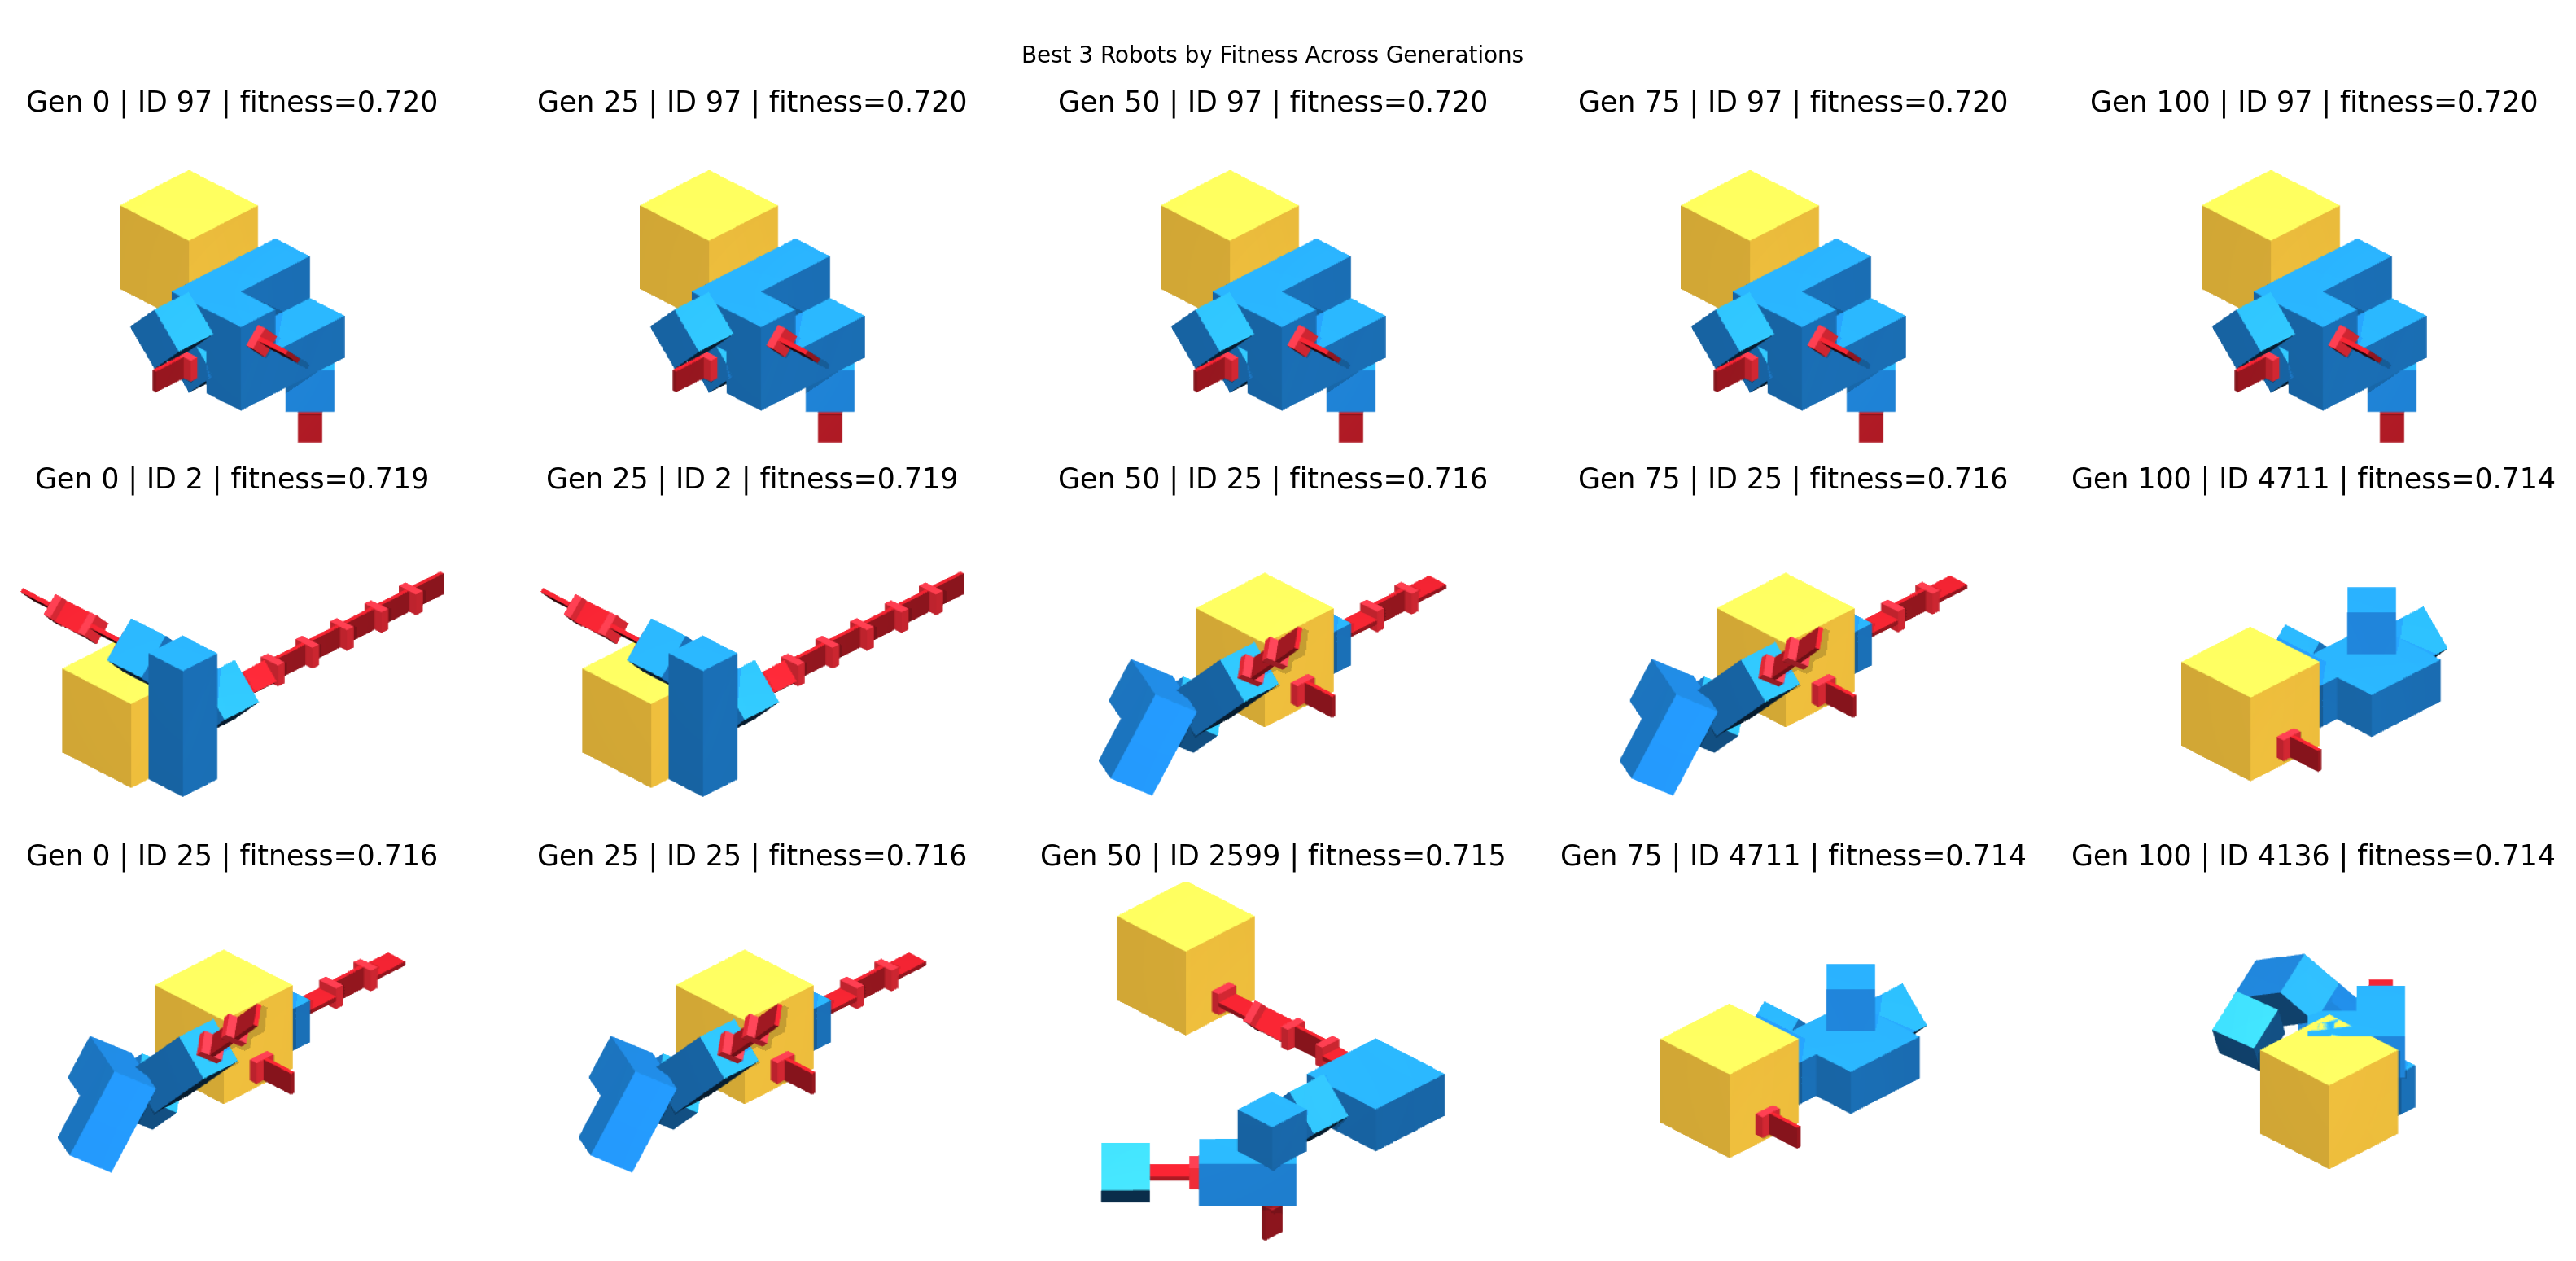

In [27]:
plotter = high_res_robot_gens(gen_df, config, top_n=amt, n_samples=gen_samples, by=col_name)                                                                                             
plotter.show()

plot least fit

In [28]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
amt = 2
gen_samples = 5
# or fitness/ novelty
col_name = 'fitness'
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

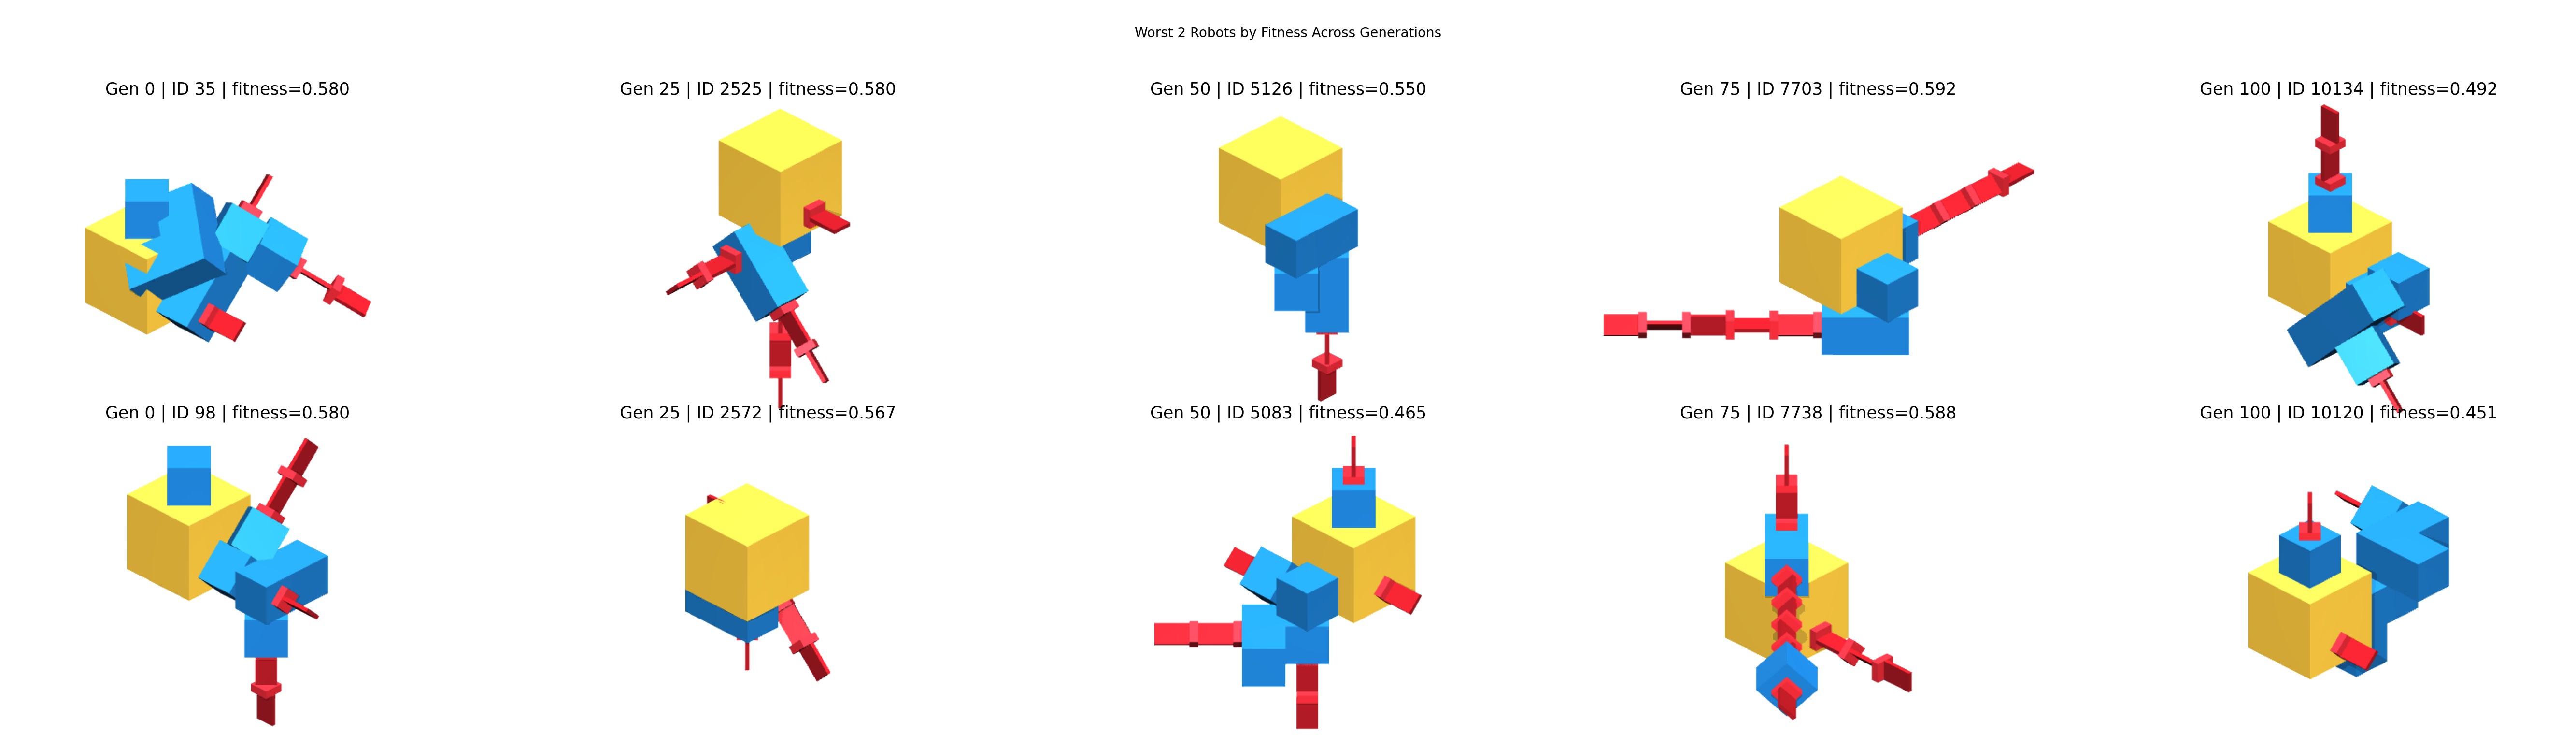

In [29]:
plotter = high_res_robot_gens(gen_df, config, top_n=-amt, n_samples=gen_samples, by=col_name) # multiplies top with -1 to get the least fit                                                                                         
plotter.show()    

---

### Similarity Frame analysis

In [30]:
frame_folders = sorted((config.OUTPUT_FOLDER / "feature_frames").glob("gen_*"))
all_feature_frames = [ctk.SimilarityFrame.load(f) for f in frame_folders]

In [31]:
archive = ctk.SimilarityArchive.load(
    frame_folder_path=f"{config.OUTPUT_FOLDER}/feature_frames",
    db_file_path=f"{config.OUTPUT_FOLDER}/database.db"
)
archive.alive_only()

archive = archive[:,:,:]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 archive = ctk.SimilarityArchive.load(                                                        │
│   2 │   frame_folder_path=f"{config.OUTPUT_FOLDER}/feature_frames",                              │
│   3 │   db_file_path=f"{config.OUTPUT_FOLDER}/database.db"                                       │
│   4 )                                                                                            │
│                                                                                                  │
│ /Users/salomepoulain/projects/ariel-zoo/src/canonical_toolkit/morphology/similarity/sim_matrix/s │
│ 4_archive.py:211 in load                                                                         │
│                                                                                                  │
│    208 │   │   │   tags_expanded = (                                                             │
│    209 │   │   │   │   data["tags_"]                                                             │
│    210 │   │   │   │   .apply(lambda x: json.loads(x) if isinstance(x, str) else x)              │
│ ❱  211 │   │   │   │   .apply(pd.Series)                                                         │
│    212 │   │   │   )                                                                             │
│    213 │   │   │   data = pd.concat([data, tags_expanded], axis=1)                               │
│    214                                                                                           │
│                                                                                                  │
│ /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.13/site-packages/pandas/core/series.py │
│ :4943 in apply                                                                                   │
│                                                                                                  │
│   4940 │   │   │   by_row=by_row,                                                                │
│   4941 │   │   │   args=args,                                                                    │
│   4942 │   │   │   kwargs=kwargs,                                                                │
│ ❱ 4943 │   │   ).apply()                                                                         │
│   4944 │                                                                                         │
│   4945 │   def _reindex_indexer(                                                                 │
│   4946 │   │   self,                                                                             │
│                                                                                                  │
│ /Users/salomepoulain/projects/ariel-zoo/.venv/lib/python3.13/site-packages/pandas/core/apply.py: │
│ 1422 in apply                                                                                    │
│                                                                                                  │
│   1419 │   │   │   return self.apply_compat()                                                    │
│   1420 │   │                                                                                     │
│   1421 │   │   # self.func is Callable                                                           │
│ ❱ 1422 │   │   return self.apply_standard()                                                      │
│   1423 │                                                                                         │
│   1424 │   def agg(self):                                                                        │
│   1425 │   │   result = super().agg()                      

In [ ]:
# sliced = archive[3,0,:]
# print(sliced[1])
# # sliced.alive_only()

# to_test = archive[3,0,:]
# print(to_test[1])
# # to_test.alive_only()
# print(to_test._id_mapper == sliced._id_mapper)


In [ ]:
# sliced.alive_only()

# print(sliced[1])

# print(to_test[1])

# print(archive[1])
# # to_test.alive_only()

# to_test.alive_only()

# print(to_test._id_mapper == sliced._id_mapper)


In [ ]:
# sliced.transformer = umap

# sliced.fit_generations()

In [ ]:
# print(to_test._id_mapper == sliced._id_mapper)

In [ ]:
# from umap import UMAP

# umapper = UMAP


In [ ]:
# sliced.transform()

In [ ]:
# print(to_test._id_mapper == sliced._id_mapper)

In [ ]:
# data_2d = sliced.get_2d_data()
# titles_2d = sliced.get_2d_titles()
# data_id = sliced.get_2d_ids()

In [ ]:
to_embed = archive[:, :, :].map('aggregate').map('aggregate')

In [ ]:

to_embed.alive_only()
print(to_embed)

In [ ]:
subset = to_embed.new_only(inplace=False)
umap = ctk.UmapConfig(
    n_neighbors=5,
).get_umap()            
fitted_reducer = subset.fit_transformer(umap)           
embedded = to_embed.transform_unique(fitted_reducer) 

In [ ]:
data_2d = embedded.get_2d_data()
data_id = embedded.get_2d_ids()
titles_2d = embedded.get_2d_titles()

In [ ]:
plotter = ctk.GridPlotter()
plotter.add_collapsed_data(data_2d)
# plotter.config.s
# plotter.transpose()
plotter.show()

plotter.to_gif()


In [ ]:
# archive.alive_only()

# cosine_archive = archive[3, :, -1].map('cosine_similarity', inplace=False)

In [ ]:
# data_2d = cosine_archive.get_2d_data() # why is that empty
# data_id = cosine_archive.get_2d_ids()
# titles_2d = cosine_archive.get_2d_titles()
# # print(data_2d)

# # print(data_id)

In [ ]:
# archive.new_only()

In [ ]:
# umap = ctk.UmapConfig(
#     # n_neighbors=5,
#     # n_jobs=-1,
#     # transform_seed=None,
#     # random_state=None
# ).get_umap()

# umap_archive = archive[3,0,:]

# print(umap_archive)

# umap_archive.transformer = umap

# umap_archive = umap_archive.fit_generations()

In [ ]:
# new = umap_archive[0,0,::10].transform()

# data_2d = new.get_2d_data()
# data_id = new.get_2d_ids()
# titles_2d = new.get_2d_titles()

# print(titles_2d)

In [ ]:
plotter = ctk.BokehGridPlotter()
# plotter.add_id_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
plotter.add_2D_numeric_data(data_2d, global_ids_2d=data_id, titles_2d=titles_2d)

plotter.add_id_styling(ids=[10012], colors=['RED'], sizes=[15])

plotter.transpose()
plotter.config.plot_width = 300
plotter.config.plot_height = 300
plotter.config.title_font_size = "small"
plotter.config.global_axis = True
plotter.show()

In [ ]:
similarity = archive.map('cosine_similarity', inplace=False)

In [ ]:
data_2d = similarity[-1].get_2d_data()
titles_2d = similarity[-1].get_2d_titles()
global_ids = similarity[-1].get_2d_ids()

In [ ]:
heat_map_plotter = ctk.BokehGridPlotter()
heat_map_plotter.add_2D_numeric_data(
    data_2d=data_2d,
    titles_2d=titles_2d,
    global_ids_2d=global_ids
)
heat_map_plotter.config.plot_width = 150
heat_map_plotter.config.plot_height = 150
heat_map_plotter.transpose()
heat_map_plotter.show()

In [ ]:
similarity_cum = similarity.map('to_cumulative', inplace=False)

In [ ]:
data_2d = similarity_cum[-1].get_2d_data()
titles_2d = similarity_cum[-1].get_2d_titles()
global_ids = similarity_cum[-1].get_2d_ids()

In [ ]:
heat_map_plotter = ctk.BokehGridPlotter()
heat_map_plotter.add_2D_numeric_data(
    data_2d=data_2d,
    titles_2d=titles_2d,
    global_ids_2d=global_ids
)
heat_map_plotter.config.plot_width = 150
heat_map_plotter.config.plot_height = 150
heat_map_plotter.transpose()
heat_map_plotter.show()

In [ ]:
data_2d = similarity_cum[:, 'BACK', ::10].get_2d_data()
titles_2d = similarity_cum[:, 'BACK', ::10].get_2d_titles()
global_ids = similarity_cum[:, 'BACK', ::10].get_2d_ids()

heat_map_plotter = ctk.BokehGridPlotter()
heat_map_plotter.add_2D_numeric_data(
    data_2d=data_2d,
    titles_2d=titles_2d,
    global_ids_2d=global_ids
)
heat_map_plotter.config.plot_width = 150
heat_map_plotter.config.plot_height = 150
heat_map_plotter.transpose()
heat_map_plotter.show()

In [ ]:
raise Error

### Heatmaps

radius cosine heatmap across spaces. show 1 GENERATION

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
generation = 9
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
max_num_inds = 100 # doing more will be laggy for the notebook
# # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
heat_map_show = all_feature_frames[generation].map('cosine_similarity', inplace=False)

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
interactive = True
cell_size = 150
# Select what area/ to plot with slicing
heat_map_show = heat_map_show[:4,:] 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
print(heat_map_show)

In [ ]:
data_2d = [
    [inst.matrix for inst in serie.matrices] 
    for serie in heat_map_show.series
]
id_map = gen_df.loc[generation, 'id'].to_dict()
n = data_2d[0][0].shape[0]
id_pairs = np.empty((n, n), dtype=object)
for i in range(n):
    id_i = id_map.get(i, i)
    for j in range(n):
        id_pairs[i, j] = (id_i, id_map.get(j, j))
n_series = len(data_2d)
n_radii = len(data_2d[0])
real_ids = [[id_pairs] * n_radii for _ in range(n_series)]
titles = [
    [f"{serie.label} - Radius {inst.radius}" for inst in serie.matrices]
    for serie in heat_map_show.series 
]

print(real_ids)

# if interactive:
#     plotter = ctk.BokehGridPlotter()
#     plotter.add_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
#     plotter.config.plot_width = cell_size
#     plotter.config.plot_height = cell_size
#     plotter.add_2D_numeric_data(
#         data_2d=data_2d,
#         global_ids_2d=real_ids,
#         titles_2d=titles
#     )
#     plotter.transpose()
# else:
#     plotter = ctk.GridPlotter()
#     plotter.add_2D_numeric_data(
#         data_2d=data_2d,
#         titles_2d=titles    
#     )
plotter.show()

radius cosine heatmap across GENERATIONS. show 1 RADIUS

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# evenly spaced out generations like before
num_generations: int | None = 6
radius = 1
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
cosine_generation_frames = [
    all_feature_frames[i].map('cosine_similarity', inplace=False) 
    for i in np.linspace(0, config.NUM_GENERATIONS, num=num_generations, dtype=int)
]

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
interactive = True
cell_size = 150
# Select what area/ to plot with slicing
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
radius_slices: list[ctk.SimilarityFrame] = [frame[radius] for frame in cosine_generation_frames]

id_gen_maps = [
    gen_df.loc[i, 'id'].to_dict()
    for i in np.linspace(0, config.NUM_GENERATIONS, num=num_generations, dtype=int)
]
n = heat_map_show.series[0].instances[0].shape[0]

id_gen_pairs = [
    [(id_map[i], id_map[j]) for j in range(n)]
    for i in range(n)
]
real_ids = [
    [id_pairs for _ in serie.instances]
    for serie in heat_map_show.series
]

In [ ]:
import numpy as np
# radius_slices: list[ctk.SimilarityFrame] = [frame[radius] for frame in cosine_generation_frames]

data_2d = []
titles_2d = []
global_ids_2d = []
gen_indices = np.linspace(0, config.NUM_GENERATIONS, num=num_generations, dtype=int)
for gen_idx, radius_frame, id_map in zip(gen_indices, radius_slices, id_gen_maps):
    gen_row = []
    gen_titles = []
    gen_ids = []
    
    for series in radius_frame.series:
        # Each series should have exactly 1 instance (at radius=3)
        inst = series.instances[0]
        gen_row.append(inst.matrix)
        gen_titles.append(f"Gen {gen_idx}\n{series.label}")
        
        # Create ID pairs for this generation
        n = inst.shape[0]  # Should be same for all
        id_pairs = [
            [(id_map[i], id_map[j]) for j in range(n)]
            for i in range(n)
        ]
        gen_ids.append(id_pairs)
    
    data_2d.append(gen_row)
    titles_2d.append(gen_titles)
    global_ids_2d.append(gen_ids)
    
if interactive:
    plotter = ctk.BokehGridPlotter()
    plotter.add_id_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
    plotter.config.plot_width = cell_size
    plotter.config.plot_height = cell_size
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        global_ids_2d=global_ids_2d,
        titles_2d=titles_2d
    )
    plotter.transpose()
else:
    plotter = ctk.GridPlotter()
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        titles_2d=titles_2d    
    )
plotter.show()

radius cosine heatmap across GENERATIONS. show 1 SPACE

### UMAP

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
generation = 0
max_radius = 3
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
umap_config = ctk.UmapConfig(
    n_neighbors=2,
    metric='cosine',
    n_jobs=-1
)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
heat_map_show = all_feature_frames[generation][:max_radius, :].map('umap_embed',config=umap_config, inplace=False)

In [ ]:
print(heat_map_show)

In [ ]:
# Get UMAP data (22×2 matrices)
data_2d = [
    [inst.matrix for inst in serie.instances] 
    for serie in heat_map_show.series
]

# Create 1D ID lists for scatter plots
id_map = gen_df.loc[generation, 'id'].to_dict()
n_points = data_2d[0][0].shape[0]  # 22 organisms

# Create 1D list of IDs [id0, id1, ..., id21]
point_ids = [id_map.get(i, i) for i in range(n_points)]

# Create real_ids as 1D lists (not 2D arrays!)
real_ids = [
    [point_ids for _ in serie.instances]  # Same IDs for all radii
    for serie in heat_map_show.series
]
if interactive:
    plotter = ctk.BokehGridPlotter()
    plotter.add_id_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
    plotter.config.plot_width = cell_size
    plotter.config.plot_height = cell_size
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        global_ids_2d=real_ids,
        titles_2d=titles
    )
    plotter.transpose()
else:
    plotter = ctk.GridPlotter()
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        titles_2d=titles    
    )
plotter.show()

Umap across generations

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# evenly spaced out generations like before
num_generations: int | None = 7
radius = 1
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
umap_config = ctk.UmapConfig(
    n_neighbors=2,
    metric='cosine',
    n_jobs=-1
)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
cosine_generation_frames = [
    all_feature_frames[i].map('cosine_similarity', inplace=False) 
    for i in np.linspace(0, config.NUM_GENERATIONS, num=num_generations, dtype=int)
]
umap_generations_frames = [
    frame[radius].map('umap_embed',config=umap_config, inplace=False) for frame in cosine_generation_frames
]

In [ ]:
data_2d = []
titles_2d = []
global_ids_2d = []
gen_indices = np.linspace(0, config.NUM_GENERATIONS, num=num_generations, dtype=int)
id_gen_maps = [
    gen_df.loc[i, 'id'].to_dict()
    for i in gen_indices
]

for gen_idx, umap_frame, id_map in zip(gen_indices, umap_generations_frames, id_gen_maps):
    gen_row = []
    gen_titles = []
    gen_ids = []
    
    for series in umap_frame.series:
        # UMAP gives 1 instance per series (radius=1)
        inst = series.instances[0]  # Shape: (n_organisms, 2)
        gen_row.append(inst.matrix)
        gen_titles.append(f"Gen {gen_idx}\n{series.label}")
        
        # FIX: For scatter plots (2D embeddings), need 1D list of IDs
        n_points = inst.matrix.shape[0]  # Number of organisms
        point_ids = [id_map.get(i, i) for i in range(n_points)]  # 1D list
        gen_ids.append(point_ids)  # Not 2D id_pairs!
    
    data_2d.append(gen_row)
    titles_2d.append(gen_titles)
    global_ids_2d.append(gen_ids)
    
if interactive:
    plotter = ctk.BokehGridPlotter()
    plotter.add_id_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
    plotter.config.plot_width = cell_size
    plotter.config.plot_height = cell_size
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        global_ids_2d=global_ids_2d,  # Now 1D lists for scatter plots
        titles_2d=titles_2d
    )
    plotter.transpose()
else:
    plotter = ctk.GridPlotter()
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        titles_2d=titles_2d    
    )
plotter.show()

In [ ]:
# If you want one UMAP plot per series (aggregate radii)
gen_row = []
gen_titles = []
gen_ids = []
for gen_idx, umap_frame, id_map in zip(gen_indices, umap_generations_frames, id_gen_maps):
    gen_row = []
    gen_titles = []
    gen_ids = []
    
    for series in umap_frame.series:
        # Aggregate UMAP embeddings across radii (average)
        all_embeddings = [inst.matrix for inst in series.instances]
        avg_embedding = np.mean(all_embeddings, axis=0)  # Average across radii
        
        gen_row.append(avg_embedding)
        gen_titles.append(f"Gen {gen_idx}\n{series.label} (avg)")
        
        # IDs
        n_points = avg_embedding.shape[0]
        point_ids = [id_map.get(i, i) for i in range(n_points)]
        gen_ids.append(point_ids)
    
    data_2d.append(gen_row)
    titles_2d.append(gen_titles)
    global_ids_2d.append(gen_ids)
    
    
if interactive:
    plotter = ctk.BokehGridPlotter()
    plotter.add_id_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
    plotter.config.plot_width = cell_size
    plotter.config.plot_height = cell_size
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        global_ids_2d=global_ids_2d,
        titles_2d=titles_2d
    )
    plotter.transpose()
else:
    plotter = ctk.GridPlotter()
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        titles_2d=titles_2d    
    )
plotter.show()

In [ ]:
data_2d = []
titles_2d = []
global_ids_2d = []
gen_indices = np.linspace(0, config.NUM_GENERATIONS, num=num_generations, dtype=int)
for gen_idx, radius_frame, id_map in zip(gen_indices, radius_slices, id_gen_maps):
    gen_row = []
    gen_titles = []
    gen_ids = []
    
    for series in radius_frame.series:
        # Each series should have exactly 1 instance (at radius=3)
        inst = series.instances[0]
        gen_row.append(inst.matrix)
        gen_titles.append(f"Gen {gen_idx}\n{series.label}")
        
        # Create ID pairs for this generation
        n = inst.shape[0]  # Should be same for all
        id_pairs = [
            [(id_map[i], id_map[j]) for j in range(n)]
            for i in range(n)
        ]
        gen_ids.append(id_pairs)
    
    data_2d.append(gen_row)
    titles_2d.append(gen_titles)
    global_ids_2d.append(gen_ids)
    
if interactive:
    plotter = ctk.BokehGridPlotter()
    plotter.add_id_thumbnails(ids=gen_df['id'], b64s=gen_df['image'])
    plotter.config.plot_width = cell_size
    plotter.config.plot_height = cell_size
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        global_ids_2d=global_ids_2d,
        titles_2d=titles_2d
    )
    plotter.transpose()
else:
    plotter = ctk.GridPlotter()
    plotter.add_2D_numeric_data(
        data_2d=data_2d,
        titles_2d=titles_2d    
    )
plotter.show()